# EECS 731 Climate Changes

**Author: Likitha Vemulapalli<br>
Date: 11-23-2020 <br>
M.S in Computer Science <br>
University of Kansas**

# Classification of Temperature and Conditions in US

#Importing required libraries

In [1]:
#importing required libraries
import pandas as pd
import numpy as np

#For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#For Cross-Validation
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

#For Classifier models
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron

# Importing Data

In [2]:
df = pd.read_csv('US.csv')
df.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,United States,01/01/1970,35.0,28.1,32.0,20.9,NaN,0.00,NaN,13.9,NaN,12.8,77.9,61.54,Overcast
1,United States,01/02/1970,41.1,25.1,33.2,18.1,NaN,0.00,NaN,17.2,NaN,10.0,37.5,59.52,Partially cloudy
2,United States,01/03/1970,38.0,26.9,33.6,15.5,NaN,0.05,NaN,17.2,NaN,10.5,73.3,67.34,"Rain, Partially cloudy"
3,United States,01/04/1970,33.2,21.8,27.0,10.9,NaN,0.00,NaN,17.2,NaN,9.5,0.0,51.89,Clear
4,United States,01/05/1970,44.0,20.0,30.2,11.1,NaN,0.00,NaN,15.0,NaN,9.3,47.1,65.60,Partially cloudy


In [3]:
#dropping the columns that are not required for classification
df = df.drop(columns = ['Name', 'Date time'])

In [4]:
df.head()

,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,35.0,28.1,32.0,20.9,NaN,0.00,NaN,13.9,NaN,12.8,77.9,61.54,Overcast
1,41.1,25.1,33.2,18.1,NaN,0.00,NaN,17.2,NaN,10.0,37.5,59.52,Partially cloudy
2,38.0,26.9,33.6,15.5,NaN,0.05,NaN,17.2,NaN,10.5,73.3,67.34,"Rain, Partially cloudy"
3,33.2,21.8,27.0,10.9,NaN,0.00,NaN,17.2,NaN,9.5,0.0,51.89,Clear
4,44.0,20.0,30.2,11.1,NaN,0.00,NaN,15.0,NaN,9.3,47.1,65.60,Partially cloudy


To remove the redundancy in the Conditions, I seperated the text based on the comma and created new column to predict the Conditions

In [5]:
df["Conditions"]= df["Conditions"].str.split(",", n = 1, expand = True) 

In [6]:
#checking for the null values
df.isnull().sum()

Maximum Temperature        0
Minimum Temperature        0
Temperature                0
Wind Chill              9784
Heat Index             13239
Precipitation              0
Snow Depth             16653
Wind Speed                 0
Wind Gust              16022
Visibility                 0
Cloud Cover                0
Relative Humidity          0
Conditions                 0
dtype: int64

Note: As we have huge number of null values in Wind Chill, Heat Index, Snow Depth, Visibility and Wind Gust we are dropping these columns

In [7]:
#removing columns with most null values
df = df.drop(columns = ['Wind Chill', 'Heat Index', 'Snow Depth', 'Wind Gust'])

In [8]:
df.head()

,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions
0,35.0,28.1,32.0,0.00,13.9,12.8,77.9,61.54,Overcast
1,41.1,25.1,33.2,0.00,17.2,10.0,37.5,59.52,Partially cloudy
2,38.0,26.9,33.6,0.05,17.2,10.5,73.3,67.34,Rain
3,33.2,21.8,27.0,0.00,17.2,9.5,0.0,51.89,Clear
4,44.0,20.0,30.2,0.00,15.0,9.3,47.1,65.60,Partially cloudy


In [9]:
#checking for the null values
df.isnull().sum()

Maximum Temperature    0
Minimum Temperature    0
Temperature            0
Precipitation          0
Wind Speed             0
Visibility             0
Cloud Cover            0
Relative Humidity      0
Conditions             0
dtype: int64

In [10]:
#For classification, categorizing the temperature data into 3 categories
tg_labels = [1,2,3]
df['US_Temp_bins'] = pd.cut(df['Temperature'], 3, labels=tg_labels, include_lowest=True)

df_temp = df[['Maximum Temperature', 'Minimum Temperature', 'Temperature', 'Precipitation', 'Wind Speed', 'Visibility', 'Cloud Cover', 'Relative Humidity',  'US_Temp_bins']]

df_temp.head()

,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,US_Temp_bins
0,35.0,28.1,32.0,0.00,13.9,12.8,77.9,61.54,1
1,41.1,25.1,33.2,0.00,17.2,10.0,37.5,59.52,2
2,38.0,26.9,33.6,0.05,17.2,10.5,73.3,67.34,2
3,33.2,21.8,27.0,0.00,17.2,9.5,0.0,51.89,1
4,44.0,20.0,30.2,0.00,15.0,9.3,47.1,65.60,1


Temperature is running value, so I splitted the temperature into three Classes - low, medium and high.

In [11]:
#low = (2.109, 32.6]
#medium = (32.6, 63.0]
#high = (63.0, 93.4]

pd.cut(df['Temperature'], 3).head()

0    (2.109, 32.6]
1     (32.6, 63.0]
2     (32.6, 63.0]
3    (2.109, 32.6]
4    (2.109, 32.6]
Name: Temperature, dtype: category
Categories (3, interval[float64]): [(2.109, 32.6] < (32.6, 63.0] < (63.0, 93.4]]

In [12]:
df_temp.head()

,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,US_Temp_bins
0,35.0,28.1,32.0,0.00,13.9,12.8,77.9,61.54,1
1,41.1,25.1,33.2,0.00,17.2,10.0,37.5,59.52,2
2,38.0,26.9,33.6,0.05,17.2,10.5,73.3,67.34,2
3,33.2,21.8,27.0,0.00,17.2,9.5,0.0,51.89,1
4,44.0,20.0,30.2,0.00,15.0,9.3,47.1,65.60,1


In [13]:
df_temp.shape

(18545, 9)

In [14]:
df_temp.isnull().sum()

Maximum Temperature    0
Minimum Temperature    0
Temperature            0
Precipitation          0
Wind Speed             0
Visibility             0
Cloud Cover            0
Relative Humidity      0
US_Temp_bins           0
dtype: int64

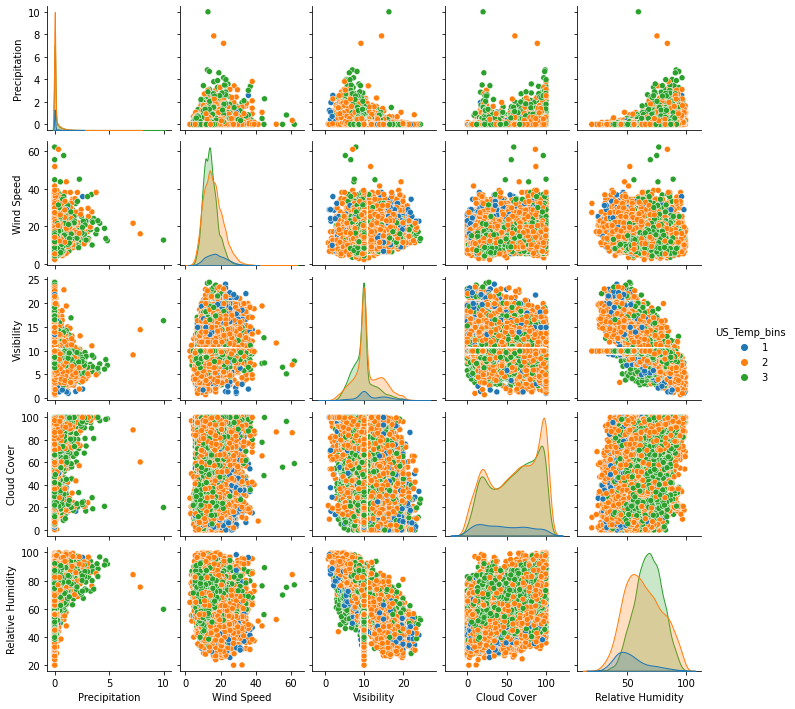

In [15]:
# Pair plot to get the distributions of temp_bins
pair_plot = sns.pairplot(df_temp, hue='US_Temp_bins',vars=['Precipitation', 'Wind Speed', 'Visibility', 'Cloud Cover', 'Relative Humidity'], height=2)

Pair plots are simple way to visualize relationships between each variable.<br>
Here, we could see distributions of each variable over temperature.

# Classification of Temperature

In [16]:
df_temp.head()

,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,US_Temp_bins
0,35.0,28.1,32.0,0.00,13.9,12.8,77.9,61.54,1
1,41.1,25.1,33.2,0.00,17.2,10.0,37.5,59.52,2
2,38.0,26.9,33.6,0.05,17.2,10.5,73.3,67.34,2
3,33.2,21.8,27.0,0.00,17.2,9.5,0.0,51.89,1
4,44.0,20.0,30.2,0.00,15.0,9.3,47.1,65.60,1


In [17]:
#removing columns which are not required
df_temp = df_temp.drop(columns = ['Maximum Temperature', 'Minimum Temperature', 'Temperature'])

In [18]:
  df_temp.head()

,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,US_Temp_bins
0,0.00,13.9,12.8,77.9,61.54,1
1,0.00,17.2,10.0,37.5,59.52,2
2,0.05,17.2,10.5,73.3,67.34,2
3,0.00,17.2,9.5,0.0,51.89,1
4,0.00,15.0,9.3,47.1,65.60,1


For using cross validation, we divide the data into arrays specifically X having the features and y being the temperature column.

In [19]:
# Split-out dataset
array = df_temp.values
X = array[:,0:5]
print(X)
y = array[:,5]
print(y)


[[0.000e+00 1.390e+01 1.280e+01 7.790e+01 6.154e+01]
 [0.000e+00 1.720e+01 1.000e+01 3.750e+01 5.952e+01]
 [5.000e-02 1.720e+01 1.050e+01 7.330e+01 6.734e+01]
 ...
 [3.100e-01 2.050e+01 9.700e+00 8.930e+01 7.692e+01]
 [0.000e+00 1.430e+01 9.900e+00 8.670e+01 6.944e+01]
 [5.100e-01 2.610e+01 9.300e+00 8.710e+01 7.321e+01]]
[1. 2. 2. ... 2. 2. 2.]


In [20]:
# 10 fold cross validation

kf = KFold(n_splits=10, random_state=1, shuffle=True)

In [21]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [22]:
#1. Linear SVM

ypred_outputs_SVC = []
yrandom_outputs_SVC = []

for train_index, test_index in kf.split(X,y):
    xtrain,xtest,ytrain,ytest=X[train_index],X[test_index],y[train_index],y[test_index]
    model = SVC(kernel='linear')
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    ypred_outputs_SVC.append(ypred)
    yrandom_outputs_SVC.append(ytest)

pSVCtotal = np.concatenate(ypred_outputs_SVC)
ySVCtotal = np.concatenate(yrandom_outputs_SVC)


acc_svc = round((accuracy_score(ySVCtotal, pSVCtotal)*100), 2)

print('Accuracy for SVC:', acc_svc)

Accuracy for SVC: 56.32


In [23]:
#2. Decision Tree Classifier

ypred_outputs_DT = []
yrandom_outputs_DT = []

for train_index, test_index in kf.split(X,y):
    xtrain,xtest,ytrain,ytest=X[train_index],X[test_index],y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier()
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    ypred_outputs_DT.append(ypred)
    yrandom_outputs_DT.append(ytest)

pDTtotal = np.concatenate(ypred_outputs_DT)
yDTtotal = np.concatenate(yrandom_outputs_DT)


acc_dt = round((accuracy_score(yDTtotal, pDTtotal)*100), 2)

print('Accuracy for Decision Tree Classifier:', acc_dt)

Accuracy for Decision Tree Classifier: 52.05


In [24]:
#3. KNN Classifier

ypred_outputs_KNN = []
yrandom_outputs_KNN = []

for train_index, test_index in kf.split(X,y):
    xtrain,xtest,ytrain,ytest=X[train_index],X[test_index],y[train_index],y[test_index]
    model = KNeighborsClassifier(n_neighbors = 12)
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    ypred_outputs_KNN.append(ypred)
    yrandom_outputs_KNN.append(ytest)

pKNNtotal = np.concatenate(ypred_outputs_KNN)
yKNNtotal = np.concatenate(yrandom_outputs_KNN)


acc_knn = round((accuracy_score(yKNNtotal, pKNNtotal)*100), 2)

print('Accuracy for KNN Classifier:', acc_knn)

Accuracy for KNN Classifier: 59.64


In [25]:
#4. Random Forest Classifier

ypred_outputs_RF = []
yrandom_outputs_RF = []

for train_index, test_index in kf.split(X,y):
    xtrain,xtest,ytrain,ytest=X[train_index],X[test_index],y[train_index],y[test_index]
    model = RandomForestClassifier(n_estimators=100)
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    ypred_outputs_RF.append(ypred)
    yrandom_outputs_RF.append(ytest)

pRFtotal = np.concatenate(ypred_outputs_RF)
yRFtotal = np.concatenate(yrandom_outputs_RF)


acc_rf = round((accuracy_score(yRFtotal, pRFtotal)*100), 2)

print('Accuracy for Random Forest Classifier:', acc_rf)

Accuracy for Random Forest Classifier: 59.96


In [26]:
#5. Gaussian NB

ypred_outputs_NBC = []
yrandom_outputs_NBC = []

for train_index, test_index in kf.split(X,y):
    xtrain,xtest,ytrain,ytest=X[train_index],X[test_index],y[train_index],y[test_index]
    model = GaussianNB()
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    ypred_outputs_NBC.append(ypred)
    yrandom_outputs_NBC.append(ytest)

pNBCtotal = np.concatenate(ypred_outputs_NBC)
yNBCtotal = np.concatenate(yrandom_outputs_NBC)


acc_gaussian = round((accuracy_score(yNBCtotal, pNBCtotal)*100), 2)

print('Accuracy for Gaussian NB:', acc_gaussian)

Accuracy for Gaussian NB: 56.48


In [27]:
#Comparing models to get the best suitable model

In [28]:
models = pd.DataFrame({
    'Model': ['Linear SVC', 'Decision Tree','KNN', 'Random Forest', 'Gaussian Naive Bayes'],
    'Accuracy': [acc_svc, acc_dt, acc_knn, acc_rf, acc_gaussian]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
3,Random Forest,59.96
2,KNN,59.64
4,Gaussian Naive Bayes,56.48
0,Linear SVC,56.32
1,Decision Tree,52.05


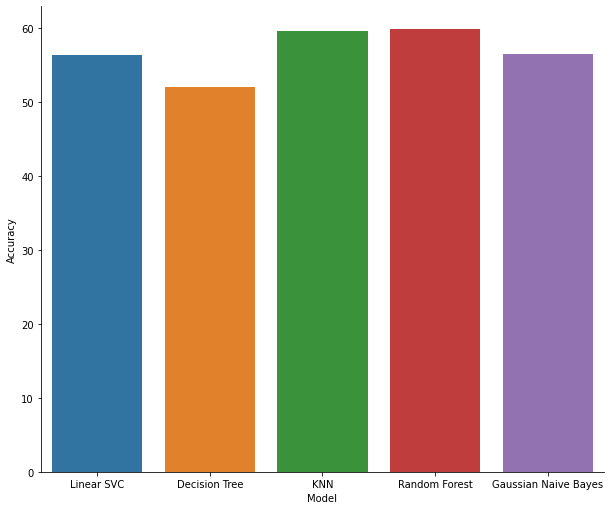

In [29]:
sns.catplot(data=models, y='Accuracy',x='Model',kind='bar',height=7,aspect=1.2)

On comparing models, we observe that the accuracies are not too accurate for this country but out of them random forest performed well than other models but the difference is pretty small for other models.

# Classification of Conditions

In [30]:
## Classifying conditions

In [31]:
df_conditions = df.copy(deep=True)

In [32]:
df_conditions.head()

,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions,US_Temp_bins
0,35.0,28.1,32.0,0.00,13.9,12.8,77.9,61.54,Overcast,1
1,41.1,25.1,33.2,0.00,17.2,10.0,37.5,59.52,Partially cloudy,2
2,38.0,26.9,33.6,0.05,17.2,10.5,73.3,67.34,Rain,2
3,33.2,21.8,27.0,0.00,17.2,9.5,0.0,51.89,Clear,1
4,44.0,20.0,30.2,0.00,15.0,9.3,47.1,65.60,Partially cloudy,1


In [33]:
df_conditions.shape

(18545, 10)

In [34]:
#removing columns which are not required
df_conditions = df_conditions.drop(columns = ['Maximum Temperature', 'Minimum Temperature', 'US_Temp_bins'])

In [35]:
df_conditions.isnull().sum()

Temperature          0
Precipitation        0
Wind Speed           0
Visibility           0
Cloud Cover          0
Relative Humidity    0
Conditions           0
dtype: int64

In [36]:
df_conditions.describe()

,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity
count,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000
mean,58.423613,0.112463,15.167037,10.246088,58.687431,64.912549
std,16.907393,0.330037,5.080048,3.377159,30.226916,14.415819
min,2.200000,0.000000,2.500000,0.700000,0.000000,19.790000
25%,44.500000,0.000000,11.400000,8.400000,31.700000,54.170000
50%,59.100000,0.000000,14.300000,9.900000,62.500000,64.880000
75%,73.800000,0.040000,18.300000,11.700000,86.300000,75.530000
max,93.400000,10.000000,62.000000,24.400000,100.000000,99.870000


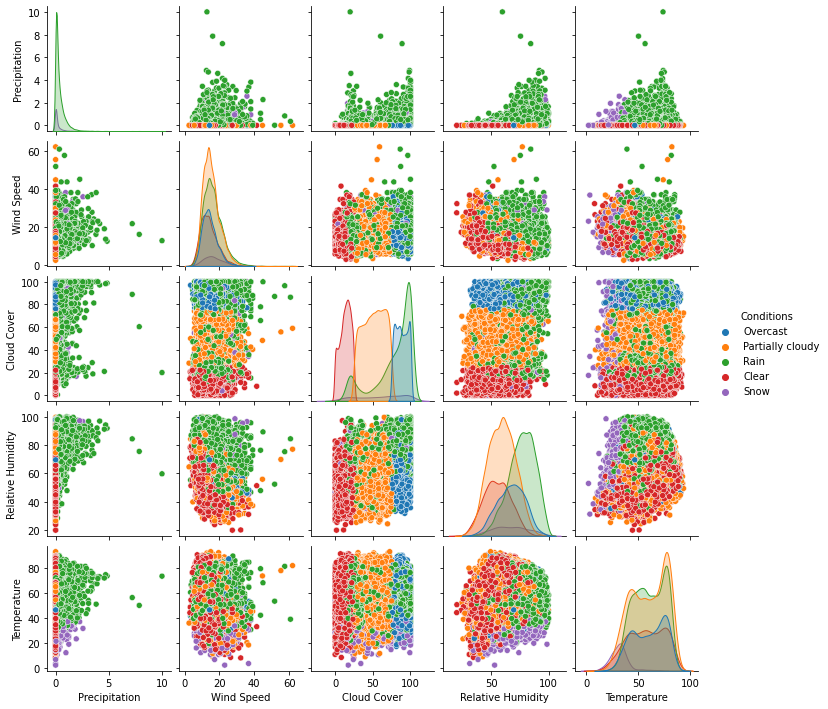

In [37]:
# Pair plot to get the distributions of Conditions
import warnings
warnings.simplefilter('ignore')
pair_plot = sns.pairplot(df_conditions, hue='Conditions',vars=['Precipitation', 'Wind Speed','Cloud Cover','Relative Humidity', 'Temperature'], height=2)

Precipitation showed variation for Conditions, we can consider it as one of the features.

In [38]:
df_conditions.head()

,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions
0,32.0,0.00,13.9,12.8,77.9,61.54,Overcast
1,33.2,0.00,17.2,10.0,37.5,59.52,Partially cloudy
2,33.6,0.05,17.2,10.5,73.3,67.34,Rain
3,27.0,0.00,17.2,9.5,0.0,51.89,Clear
4,30.2,0.00,15.0,9.3,47.1,65.60,Partially cloudy


For cross validation we are splitting the data into X consists of features and y has conditions in it.

In [39]:
# Split-out dataset
array = df_conditions.values
X = array[:,0:6]
print(X)
y = array[:,6]
print(y)


[[32.0 0.0 13.9 12.8 77.9 61.54]
 [33.2 0.0 17.2 10.0 37.5 59.52]
 [33.6 0.05 17.2 10.5 73.3 67.34]
 ...
 [50.9 0.31 20.5 9.7 89.3 76.92]
 [46.6 0.0 14.3 9.9 86.7 69.44]
 [51.5 0.51 26.1 9.3 87.1 73.21]]
['Overcast' 'Partially cloudy' 'Rain' ... 'Rain' 'Overcast' 'Rain']


In [40]:
# 10 fold cross validation

kf = KFold(n_splits=10, random_state=None, shuffle=False)

In [41]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [42]:
#1. Linear SVM

ypred_outputs_SVC = []
yrandom_outputs_SVC = []

for train_index, test_index in kf.split(X,y):
    xtrain,xtest,ytrain,ytest=X[train_index],X[test_index],y[train_index],y[test_index]
    model = SVC(kernel='linear')
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    ypred_outputs_SVC.append(ypred)
    yrandom_outputs_SVC.append(ytest)

pSVCtotal = np.concatenate(ypred_outputs_SVC)
ySVCtotal = np.concatenate(yrandom_outputs_SVC)


acc_svc = round((accuracy_score(ySVCtotal, pSVCtotal)*100), 2)

print('Accuracy for SVC:', acc_svc)

Accuracy for SVC: 81.21


In [43]:
#2. Decision Tree Classifier

ypred_outputs_DT = []
yrandom_outputs_DT = []

for train_index, test_index in kf.split(X,y):
    xtrain,xtest,ytrain,ytest=X[train_index],X[test_index],y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier()
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    ypred_outputs_DT.append(ypred)
    yrandom_outputs_DT.append(ytest)

pDTtotal = np.concatenate(ypred_outputs_DT)
yDTtotal = np.concatenate(yrandom_outputs_DT)


acc_dt = round((accuracy_score(yDTtotal, pDTtotal)*100), 2)

print('Accuracy for Decision Tree Classifier:', acc_dt)

Accuracy for Decision Tree Classifier: 94.99


In [44]:
#3. KNN Classifier

ypred_outputs_KNN = []
yrandom_outputs_KNN = []

for train_index, test_index in kf.split(X,y):
    xtrain,xtest,ytrain,ytest=X[train_index],X[test_index],y[train_index],y[test_index]
    model = KNeighborsClassifier(n_neighbors = 5)
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    ypred_outputs_KNN.append(ypred)
    yrandom_outputs_KNN.append(ytest)

pKNNtotal = np.concatenate(ypred_outputs_KNN)
yKNNtotal = np.concatenate(yrandom_outputs_KNN)


acc_knn = round((accuracy_score(yKNNtotal, pKNNtotal)*100), 2)

print('Accuracy for KNN Classifier:', acc_knn)

Accuracy for KNN Classifier: 77.64


In [45]:
#4. Random Forest Classifier

ypred_outputs_RF = []
yrandom_outputs_RF = []

for train_index, test_index in kf.split(X,y):
    xtrain,xtest,ytrain,ytest=X[train_index],X[test_index],y[train_index],y[test_index]
    model = RandomForestClassifier(n_estimators=100)
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    ypred_outputs_RF.append(ypred)
    yrandom_outputs_RF.append(ytest)

pRFtotal = np.concatenate(ypred_outputs_RF)
yRFtotal = np.concatenate(yrandom_outputs_RF)


acc_rf = round((accuracy_score(yRFtotal, pRFtotal)*100), 2)

print('Accuracy for Random Forest Classifier:', acc_rf)

Accuracy for Random Forest Classifier: 96.89


In [46]:
#5. Gaussian NB

ypred_outputs_NBC = []
yrandom_outputs_NBC = []

for train_index, test_index in kf.split(X,y):
    xtrain,xtest,ytrain,ytest=X[train_index],X[test_index],y[train_index],y[test_index]
    model = GaussianNB()
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    ypred_outputs_NBC.append(ypred)
    yrandom_outputs_NBC.append(ytest)

pNBCtotal = np.concatenate(ypred_outputs_NBC)
yNBCtotal = np.concatenate(yrandom_outputs_NBC)


acc_gaussian = round((accuracy_score(yNBCtotal, pNBCtotal)*100), 2)

print('Accuracy for Gaussian NB:', acc_gaussian)

Accuracy for Gaussian NB: 93.03


In [47]:
#Comparing models to get the best suitable model

In [48]:
models = pd.DataFrame({
    'Model': ['Linear SVC', 'Decision Tree','KNN', 'Random Forest', 'Gaussian Naive Bayes'],
    'Accuracy': [acc_svc, acc_dt, acc_knn, acc_rf, acc_gaussian]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
3,Random Forest,96.89
1,Decision Tree,94.99
4,Gaussian Naive Bayes,93.03
0,Linear SVC,81.21
2,KNN,77.64


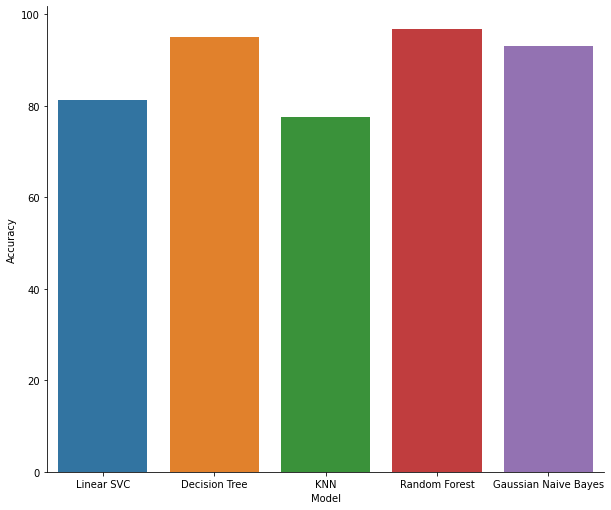

In [49]:
sns.catplot(data=models,y='Accuracy',x='Model',kind='bar',height=7,aspect=1.2)

We can see clearly that Decision Tree and Random Forest Classifiers performed pretty good on predicting the test data accurately.